In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load dataset
file_path = r'C:\Users\ACER\Documents\BAN6800\customer_segmentation_data.csv'
customer_data = pd.read_csv(file_path)

# Display basic info
print("Dataset Info:")
print(customer_data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53503 entries, 0 to 53502
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Customer ID                         53503 non-null  int64 
 1   Age                                 53503 non-null  int64 
 2   Gender                              53503 non-null  object
 3   Marital Status                      53503 non-null  object
 4   Education Level                     53503 non-null  object
 5   Geographic Information              53503 non-null  object
 6   Occupation                          53503 non-null  object
 7   Income Level                        53503 non-null  int64 
 8   Behavioral Data                     53503 non-null  object
 9   Purchase History                    53503 non-null  object
 10  Interactions with Customer Service  53503 non-null  object
 11  Insurance Products Owned            5350

In [3]:

# Check for missing values
print("\nMissing Values:")
print(customer_data.isnull().sum())



Missing Values:
Customer ID                           0
Age                                   0
Gender                                0
Marital Status                        0
Education Level                       0
Geographic Information                0
Occupation                            0
Income Level                          0
Behavioral Data                       0
Purchase History                      0
Interactions with Customer Service    0
Insurance Products Owned              0
Coverage Amount                       0
Premium Amount                        0
Policy Type                           0
Customer Preferences                  0
Preferred Communication Channel       0
Preferred Contact Time                0
Preferred Language                    0
Segmentation Group                    0
dtype: int64


In [5]:

# Display the first few rows
print("\nFirst Five Rows:")
print(customer_data.head())




First Five Rows:
   Customer ID  Age  Gender Marital Status    Education Level  \
0        84966   23  Female        Married   Associate Degree   
1        95568   26    Male        Widowed          Doctorate   
2        10544   29  Female         Single   Associate Degree   
3        77033   20    Male       Divorced  Bachelor's Degree   
4        88160   25  Female      Separated  Bachelor's Degree   

  Geographic Information    Occupation  Income Level Behavioral Data  \
0                Mizoram  Entrepreneur         70541         policy5   
1                    Goa       Manager         54168         policy5   
2              Rajasthan  Entrepreneur         73899         policy5   
3                 Sikkim  Entrepreneur         63381         policy5   
4            West Bengal       Manager         38794         policy1   

  Purchase History Interactions with Customer Service  \
0       04-10-2018                              Phone   
1       11-06-2018                          

In [7]:
# Step 1: Encode Categorical Variables
label_enc = LabelEncoder()
categorical_columns = [
    'Gender', 'Marital Status', 'Education Level', 'Geographic Information', 
    'Occupation', 'Behavioral Data', 'Policy Type', 'Customer Preferences', 
    'Preferred Communication Channel', 'Preferred Contact Time', 
    'Preferred Language', 'Segmentation Group'
]

for col in categorical_columns:
    customer_data[col] = label_enc.fit_transform(customer_data[col])



In [9]:
# Step 2: Convert date-like fields to datetime
customer_data['Purchase History'] = pd.to_datetime(customer_data['Purchase History'], errors='coerce')

# Extract useful features from the date (Year, Month, Day)
customer_data['Purchase Year'] = customer_data['Purchase History'].dt.year
customer_data['Purchase Month'] = customer_data['Purchase History'].dt.month
customer_data['Purchase Day'] = customer_data['Purchase History'].dt.day

# Drop original Purchase History column
customer_data.drop('Purchase History', axis=1, inplace=True)



In [11]:
# Step 3: Normalize Numeric Features
scaler = StandardScaler()
numeric_columns = ['Age', 'Income Level', 'Coverage Amount', 'Premium Amount']
customer_data[numeric_columns] = scaler.fit_transform(customer_data[numeric_columns])

# Step 4: Handle Missing Values (if any)
customer_data.fillna(0, inplace=True)

# Step 5: Save the Processed Dataset
processed_file_path = r'C:\Users\ACER\Documents\BAN6800\processed_customer_data.csv'
customer_data.to_csv(processed_file_path, index=False)

print(f"\nPreprocessed data saved to {processed_file_path}")



Preprocessed data saved to C:\Users\ACER\Documents\BAN6800\processed_customer_data.csv


C:\Users\ACER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


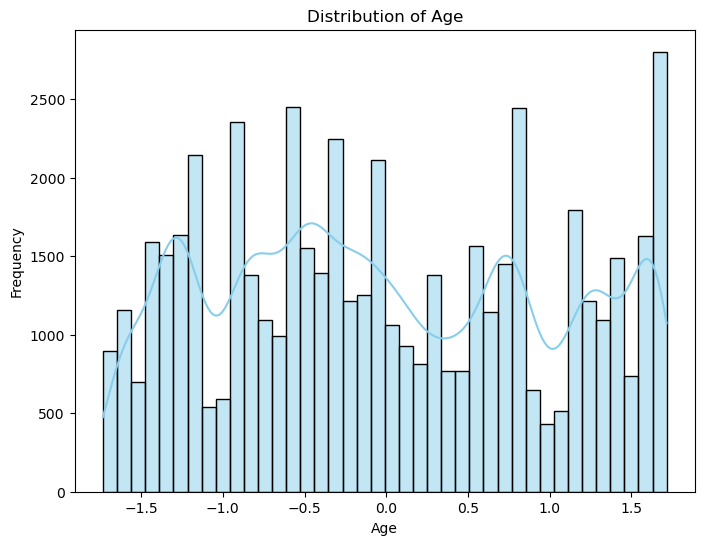

Saved Age distribution plot to C:\Users\ACER\Documents\BAN6800\Age_distribution.png


C:\Users\ACER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


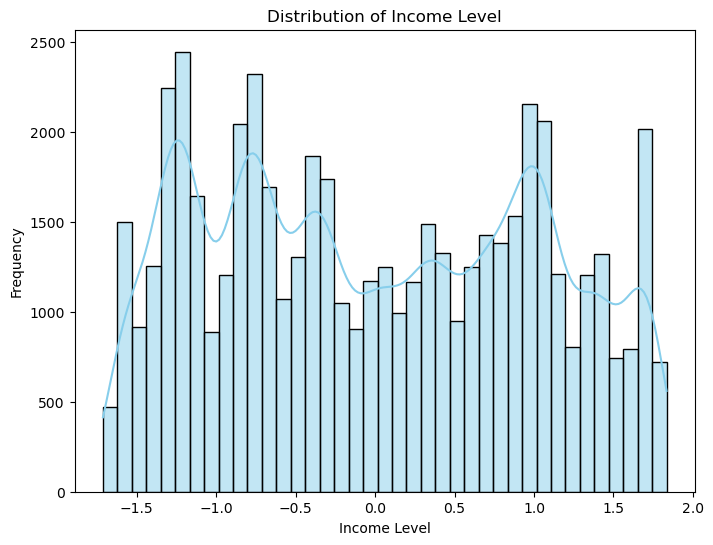

Saved Income Level distribution plot to C:\Users\ACER\Documents\BAN6800\Income Level_distribution.png


C:\Users\ACER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


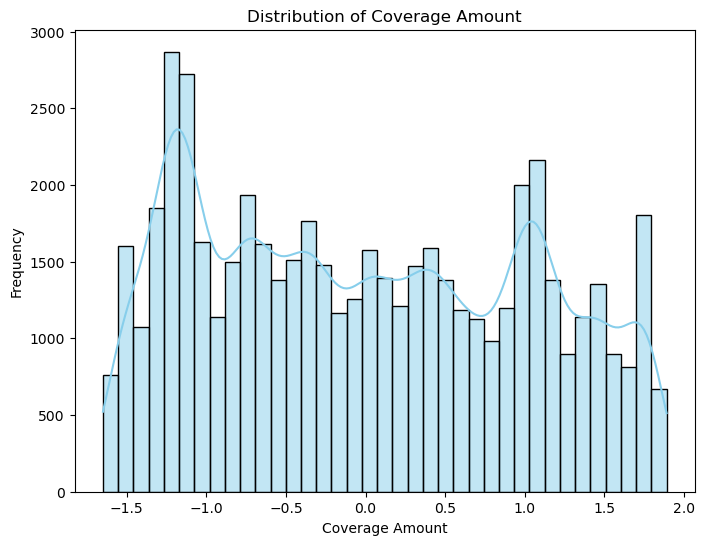

Saved Coverage Amount distribution plot to C:\Users\ACER\Documents\BAN6800\Coverage Amount_distribution.png


C:\Users\ACER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


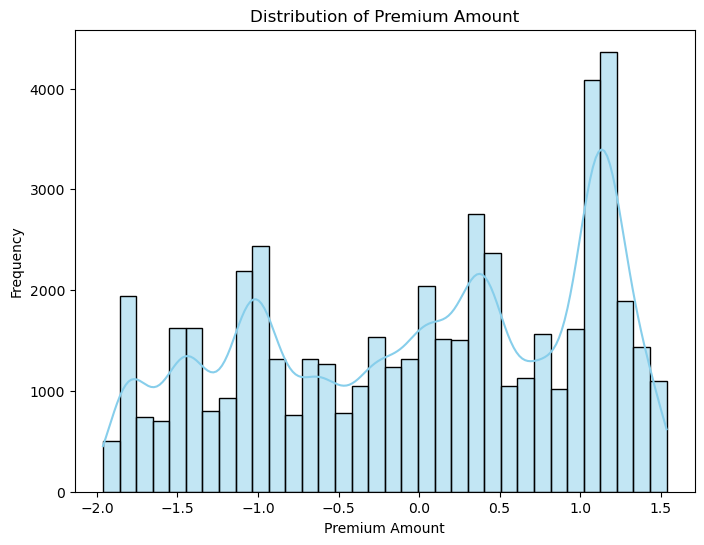

Saved Premium Amount distribution plot to C:\Users\ACER\Documents\BAN6800\Premium Amount_distribution.png


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Replace infinite values with NaN
customer_data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Optionally, handle NaN values - filling with 0 or using another method like column mean
customer_data.fillna(0, inplace=True)  # You can replace 0 with customer_data.mean() if needed

# List of numeric columns to plot
numeric_columns = ['Age', 'Income Level', 'Coverage Amount', 'Premium Amount']

# Loop through each column and generate histograms
for col in numeric_columns:
    plt.figure(figsize=(8, 6))  # Create a new figure for each plot
    sns.histplot(customer_data[col], kde=True, color='skyblue')  # Plot histogram with KDE
    plt.title(f'Distribution of {col}')  # Set the title
    plt.xlabel(col)  # Label for the x-axis
    plt.ylabel('Frequency')  # Label for the y-axis

    # Save each plot with a unique name based on the column
    file_path = fr'C:\Users\ACER\Documents\BAN6800\{col}_distribution.png'
    plt.savefig(file_path)  # Save plot for later use
    plt.show()  # Display the plot

    print(f"Saved {col} distribution plot to {file_path}")  # Confirmation of saved plot


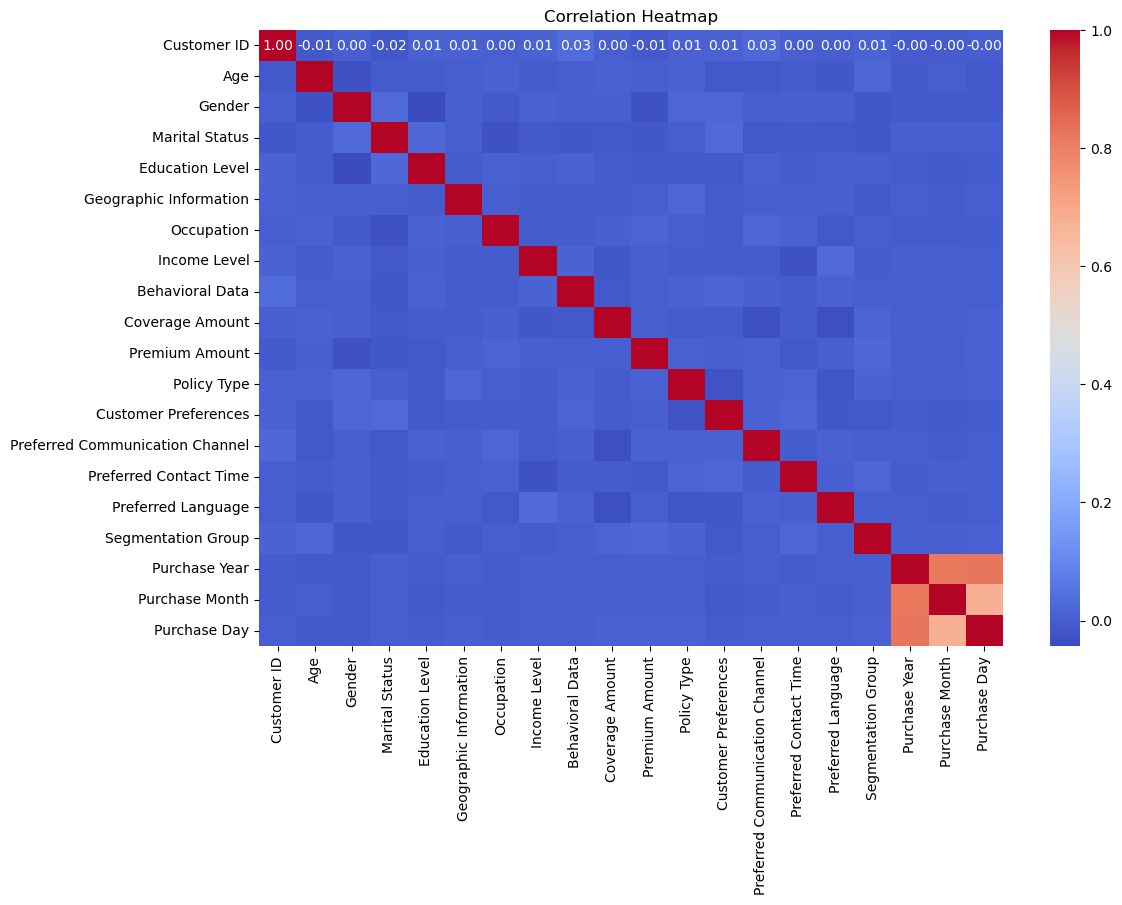

Correlation heatmap saved to C:\Users\ACER\Documents\BAN6800\correlation_heatmap.png


In [23]:
# Select only numeric columns for correlation calculation
numeric_data = customer_data.select_dtypes(include=['number'])

# Check if there are any numeric columns to compute correlation
if numeric_data.empty:
    print("No numeric columns found for correlation matrix.")
else:
    # Correlation Heatmap
    plt.figure(figsize=(12, 8))
    correlation_matrix = numeric_data.corr()
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
    plt.title("Correlation Heatmap")

    # Save the heatmap to a specific file
    heatmap_path = r'C:\Users\ACER\Documents\BAN6800\correlation_heatmap.png'
    plt.savefig(heatmap_path)  # Save for presentation
    plt.show()
    print(f"Correlation heatmap saved to {heatmap_path}")


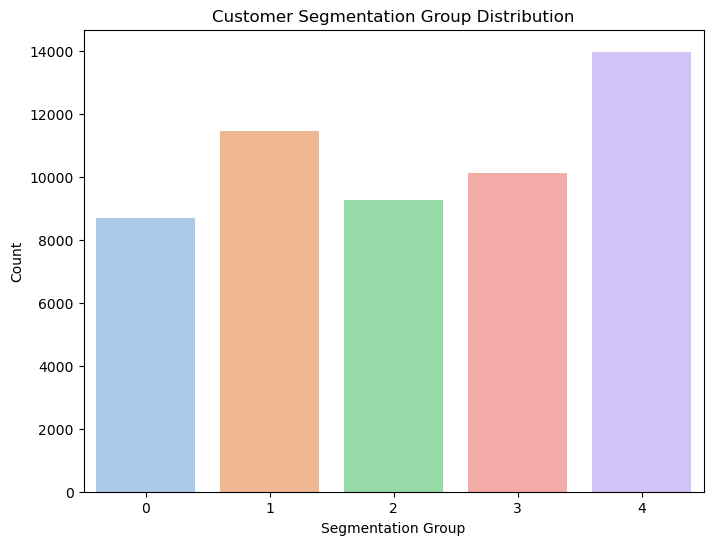

Segmentation group distribution plot saved to C:\Users\ACER\Documents\BAN6800\segmentation_group_distribution.png


In [25]:
# Visualize Segmentation Group Counts
plt.figure(figsize=(8, 6))
sns.countplot(x='Segmentation Group', data=customer_data, palette='pastel')
plt.title('Customer Segmentation Group Distribution')
plt.xlabel('Segmentation Group')
plt.ylabel('Count')

# Save the plot to a specific file
segmentation_path = r'C:\Users\ACER\Documents\BAN6800\segmentation_group_distribution.png'
plt.savefig(segmentation_path)  # Save for presentation
plt.show()
print(f"Segmentation group distribution plot saved to {segmentation_path}")


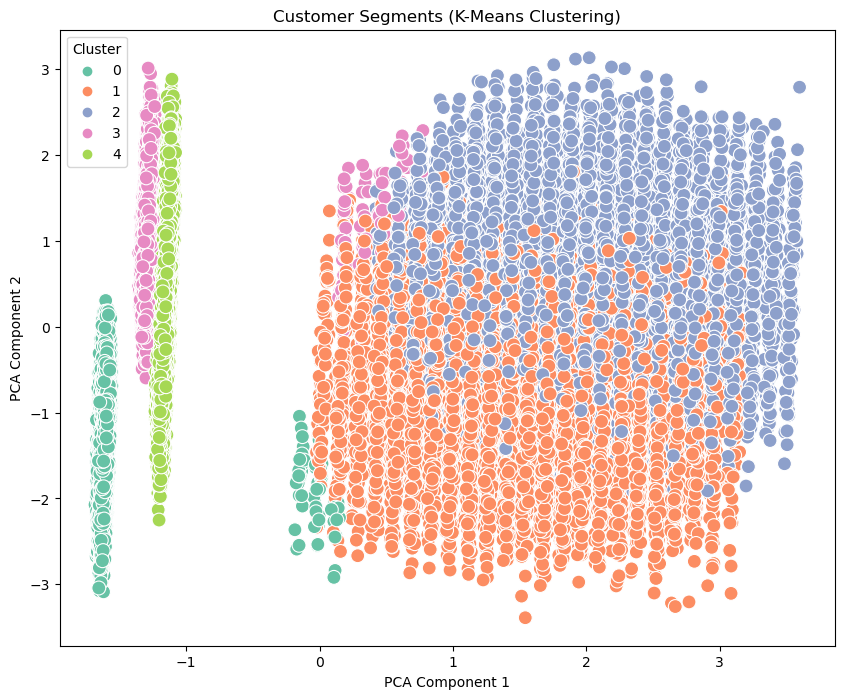

Clustered data saved to C:\Users\ACER\Documents\BAN6800\clustered_customer_data.csv


In [28]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select only numeric columns for clustering
numeric_data = customer_data.select_dtypes(include=['number'])

# Check if there are any numeric columns to use for clustering
if numeric_data.empty:
    raise ValueError("No numeric columns found for clustering.")

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_data)

# Reduce dimensions for visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply K-Means clustering with n_init explicitly set
kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)  # Specify n_init explicitly
customer_data['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize Clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=customer_data['Cluster'], palette='Set2', s=100)
plt.title("Customer Segments (K-Means Clustering)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.savefig(r'C:\Users\ACER\Documents\BAN6800\kmeans_clustering.png')  # Save for presentation
plt.show()

# Save the updated dataset with clusters
clustered_file_path = r'C:\Users\ACER\Documents\BAN6800\clustered_customer_data.csv'
customer_data.to_csv(clustered_file_path, index=False)
print(f"Clustered data saved to {clustered_file_path}")

In [30]:
import joblib

# Save models with the current scikit-learn version
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(kmeans, 'kmeans_model.pkl')
print("Models saved with the current scikit-learn version.")

Models saved with the current scikit-learn version.


In [ ]:
from flask import Flask, request, jsonify
import pandas as pd
import joblib

# Load the scaler and model
scaler = joblib.load('scaler.pkl')
kmeans = joblib.load('kmeans_model.pkl')

# Create the Flask app
app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict_cluster():
    try:
        # Get JSON data from request
        data = request.json
        input_df = pd.DataFrame(data)

        # Scale the input data
        X_scaled = scaler.transform(input_df)

        # Predict clusters
        clusters = kmeans.predict(X_scaled)
        return jsonify({'clusters': clusters.tolist()})
    except Exception as e:
        return jsonify({'error': str(e)})

if __name__ == '__main__':
    app.run(debug=True)


In [32]:
import joblib

try:
    scaler = joblib.load('scaler.pkl')
    kmeans = joblib.load('kmeans_model.pkl')
    print("Models loaded successfully!")
except Exception as e:
    print(f"Error loading models: {e}")

Models loaded successfully!


In [34]:
import sklearn
print(sklearn.__version__)


1.6.0


In [36]:
import sys
print(sys.executable)


C:\Users\ACER\anaconda3\python.exe


In [38]:
# Check feature order before training
print(numeric_data.columns)

Index(['Customer ID', 'Age', 'Gender', 'Marital Status', 'Education Level',
       'Geographic Information', 'Occupation', 'Income Level',
       'Behavioral Data', 'Coverage Amount', 'Premium Amount', 'Policy Type',
       'Customer Preferences', 'Preferred Communication Channel',
       'Preferred Contact Time', 'Preferred Language', 'Segmentation Group',
       'Purchase Year', 'Purchase Month', 'Purchase Day', 'Cluster'],
      dtype='object')


In [40]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import joblib

# Your customer_data DataFrame (load or create your data here)
# customer_data = pd.read_csv('your_data.csv')  # Assuming you load the dataset

# List of categorical columns to encode
categorical_columns = [
    'Gender', 'Marital Status', 'Education Level', 'Geographic Information', 
    'Occupation', 'Behavioral Data', 'Policy Type', 'Customer Preferences', 
    'Preferred Communication Channel', 'Preferred Contact Time', 
    'Preferred Language', 'Segmentation Group'
]

# Initialize the LabelEncoder
label_encoders = {}

# Apply Label Encoding to categorical columns
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    customer_data[col] = label_encoders[col].fit_transform(customer_data[col])

# Save the label encoders (so you can use them later)
joblib.dump(label_encoders, 'label_encoders.pkl')

# Save the scaler and model (you can do it at the same time)
# joblib.dump(scaler, 'scaler.pkl')
# joblib.dump(kmeans, 'kmeans_model.pkl')

print("Label encoders saved successfully!")


Label encoders saved successfully!


In [29]:
import tarfile
import os

# Local directory where the files are located
local_directory = r'C:\Users\ACER'

# Files to include in the archive
files_to_archive = ['kmeans_model.pkl', 'label_encoders.pkl', 'scaler.pkl']

# Create a tar.gz archive
archive_name = 'model_artifacts.tar.gz'
archive_path = os.path.join(local_directory, archive_name)

with tarfile.open(archive_path, mode='w:gz') as archive:
    for file in files_to_archive:
        file_path = os.path.join(local_directory, file)
        archive.add(file_path, arcname=file)  

print(f"Archive created at {archive_path}")


Archive created at C:\Users\ACER\model_artifacts.tar.gz


In [43]:
import os
import boto3
import tarfile
import sagemaker
from sagemaker.sklearn import SKLearnModel

# Set up AWS credentials and SageMaker session
sagemaker_session = sagemaker.Session()
role = 'arn:aws:iam::588738572888:role/Sagemaker-role'  # Your AWS IAM role ARN
bucket = sagemaker_session.default_bucket()  # Default S3 bucket

# Endpoint name
endpoint_name = 'customer-segmentation-endpoint'

# Delete existing endpoint and configuration
sagemaker_client = boto3.client('sagemaker')

def delete_existing_endpoint(endpoint_name):
    try:
        print(f"Checking if endpoint '{endpoint_name}' exists...")
        
        # Check for existing endpoint
        response = sagemaker_client.describe_endpoint(EndpointName=endpoint_name)
        if response['EndpointStatus'] != 'Deleted':
            print(f"Deleting existing endpoint: {endpoint_name}")
            sagemaker_client.delete_endpoint(EndpointName=endpoint_name)
            sagemaker_client.get_waiter('endpoint_deleted').wait(EndpointName=endpoint_name)
            print(f"Endpoint '{endpoint_name}' deleted successfully.")
        
        # Delete endpoint configuration
        print(f"Deleting endpoint configuration: {endpoint_name}")
        sagemaker_client.delete_endpoint_config(EndpointConfigName=endpoint_name)
        print(f"Endpoint configuration '{endpoint_name}' deleted successfully.")
    
    except sagemaker_client.exceptions.ClientError as e:
        print(f"No existing endpoint or configuration found for '{endpoint_name}': {e}")

# Call the function to delete existing resources
delete_existing_endpoint(endpoint_name)

# Local directory and file paths
local_directory = r'C:\Users\ACER'
model_file = os.path.join(local_directory, 'kmeans_model.pkl')
label_encoders_file = os.path.join(local_directory, 'label_encoders.pkl')
scaler_file = os.path.join(local_directory, 'scaler.pkl')

# Create a tar.gz archive of the model files
archive_name = 'model_artifacts.tar.gz'
archive_path = os.path.join(local_directory, archive_name)

with tarfile.open(archive_path, mode='w:gz') as archive:
    archive.add(model_file, arcname='kmeans_model.pkl')
    archive.add(label_encoders_file, arcname='label_encoders.pkl')
    archive.add(scaler_file, arcname='scaler.pkl')

print(f"Archive created: {archive_path}")

# Upload the archive to S3
s3_client = boto3.client('s3')
s3_client.upload_file(archive_path, bucket, archive_name)
print(f"Uploaded {archive_path} to s3://{bucket}/{archive_name}")

# S3 path to the tar.gz archive
s3_model_path = f"s3://{bucket}/{archive_name}"

# Define the SKLearnModel
model = SKLearnModel(
    model_data=s3_model_path,  
    role=role,
    entry_point='inference.py',
    framework_version='0.23-1',
    sagemaker_session=sagemaker_session
)

# Deploy the model
predictor = model.deploy(
    instance_type='ml.t2.medium',
    initial_instance_count=1,
    endpoint_name=endpoint_name
)

print(f"Model deployed successfully at endpoint: {endpoint_name}")


sagemaker.config INFO - Not applying SDK defaults from location: C:\ProgramData\sagemaker\sagemaker\config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: C:\Users\ACER\AppData\Local\sagemaker\sagemaker\config.yaml
Checking if endpoint 'customer-segmentation-endpoint' exists...
Deleting existing endpoint: customer-segmentation-endpoint
Endpoint 'customer-segmentation-endpoint' deleted successfully.
Deleting endpoint configuration: customer-segmentation-endpoint
Endpoint configuration 'customer-segmentation-endpoint' deleted successfully.
Archive created: C:\Users\ACER\model_artifacts.tar.gz
Uploaded C:\Users\ACER\model_artifacts.tar.gz to s3://sagemaker-us-east-1-588738572888/model_artifacts.tar.gz
-----------!Model deployed successfully at endpoint: customer-segmentation-endpoint
